In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
import warnings
# run block of code and catch warnings
with warnings.catch_warnings():
    
      # ignore all caught warnings
        warnings.filterwarnings("ignore")
       # execute code that will generate warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')

In [6]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 468D-6BAF

 Directory of C:\Users\I NET\OneDrive\Desktop\data science\data assig\Ramdom forest

06/01/2023  09:32 PM    <DIR>          .
06/01/2023  09:32 PM    <DIR>          ..
28/12/2022  11:08 AM    <DIR>          .ipynb_checkpoints
06/01/2023  09:32 PM           552,316 Company RF.ipynb
27/12/2022  05:19 PM            17,023 Company_Data.csv
27/12/2022  05:19 PM            21,837 Fraud_check (1).csv
27/12/2022  05:19 PM             1,378 problem statement(company data).txt
27/12/2022  05:19 PM               133 Problem_statement(Fraudcheck).txt
06/01/2023  09:32 PM           107,547 RF classification.ipynb
28/12/2022  11:05 AM               129 tree.dot
               7 File(s)        700,363 bytes
               3 Dir(s)  859,986,288,640 bytes free


In [7]:
df=pd.read_csv("Fraud_check (1).csv")

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
df["Taxable.Income"].mask(df["Taxable.Income"]<=30000,0,inplace=True)
df["Taxable.Income"].mask(df["Taxable.Income"]>=30000,1,inplace=True)

In [11]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO
599,NO,Divorced,1,158137,16,NO


In [12]:
df["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [15]:
leb=LabelEncoder()
df['Undergrad']=leb.fit_transform(df['Undergrad'])
df['Marital.Status']=leb.fit_transform(df['Marital.Status'])
df['Urban']=leb.fit_transform(df['Urban'])

In [16]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0
599,0,0,1,158137,16,0


In [17]:
miN=MinMaxScaler()
df2=df.values
df=pd.DataFrame(miN.fit_transform(X=df2),columns=df.columns)

In [18]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,1.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,1.0,0.622394,0.600000,1.0
2,0.0,0.5,1.0,0.772568,1.000000,1.0
3,1.0,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,1.0,0.010081,0.933333,0.0


In [19]:
x=df.iloc[:,[0,1,3,4,5]]

In [20]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0


In [21]:
y=df.iloc[:,[2]]

In [22]:
y.head()

,Taxable.Income
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=True, random_state=30)

# model buliding 

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [20,50,100],
    'max_depth': [5,10,9,3,6],
    'min_samples_leaf': [10,13,14],
    'random_state': [0,9,20]}

reg=RandomForestClassifier()
grid= GridSearchCV(estimator=reg,cv=5,param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 9, 3, 6],
                         'min_samples_leaf': [10, 13, 14],
                         'n_estimators': [20, 50, 100],
                         'random_state': [0, 9, 20]})

In [31]:
grid.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=20,
                       random_state=0)

In [37]:
regr= RandomForestClassifier(random_state=0,n_estimators=20,min_samples_leaf=10,max_depth=5)
model=regr.fit(X_train, y_train)
pred=model.predict(X_test)

In [38]:
y_pred=model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
m=classification_report(y_pred,y_test)

In [41]:
print(m)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.79      0.88       180

    accuracy                           0.79       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.79      0.88       180



In [43]:
from sklearn import tree

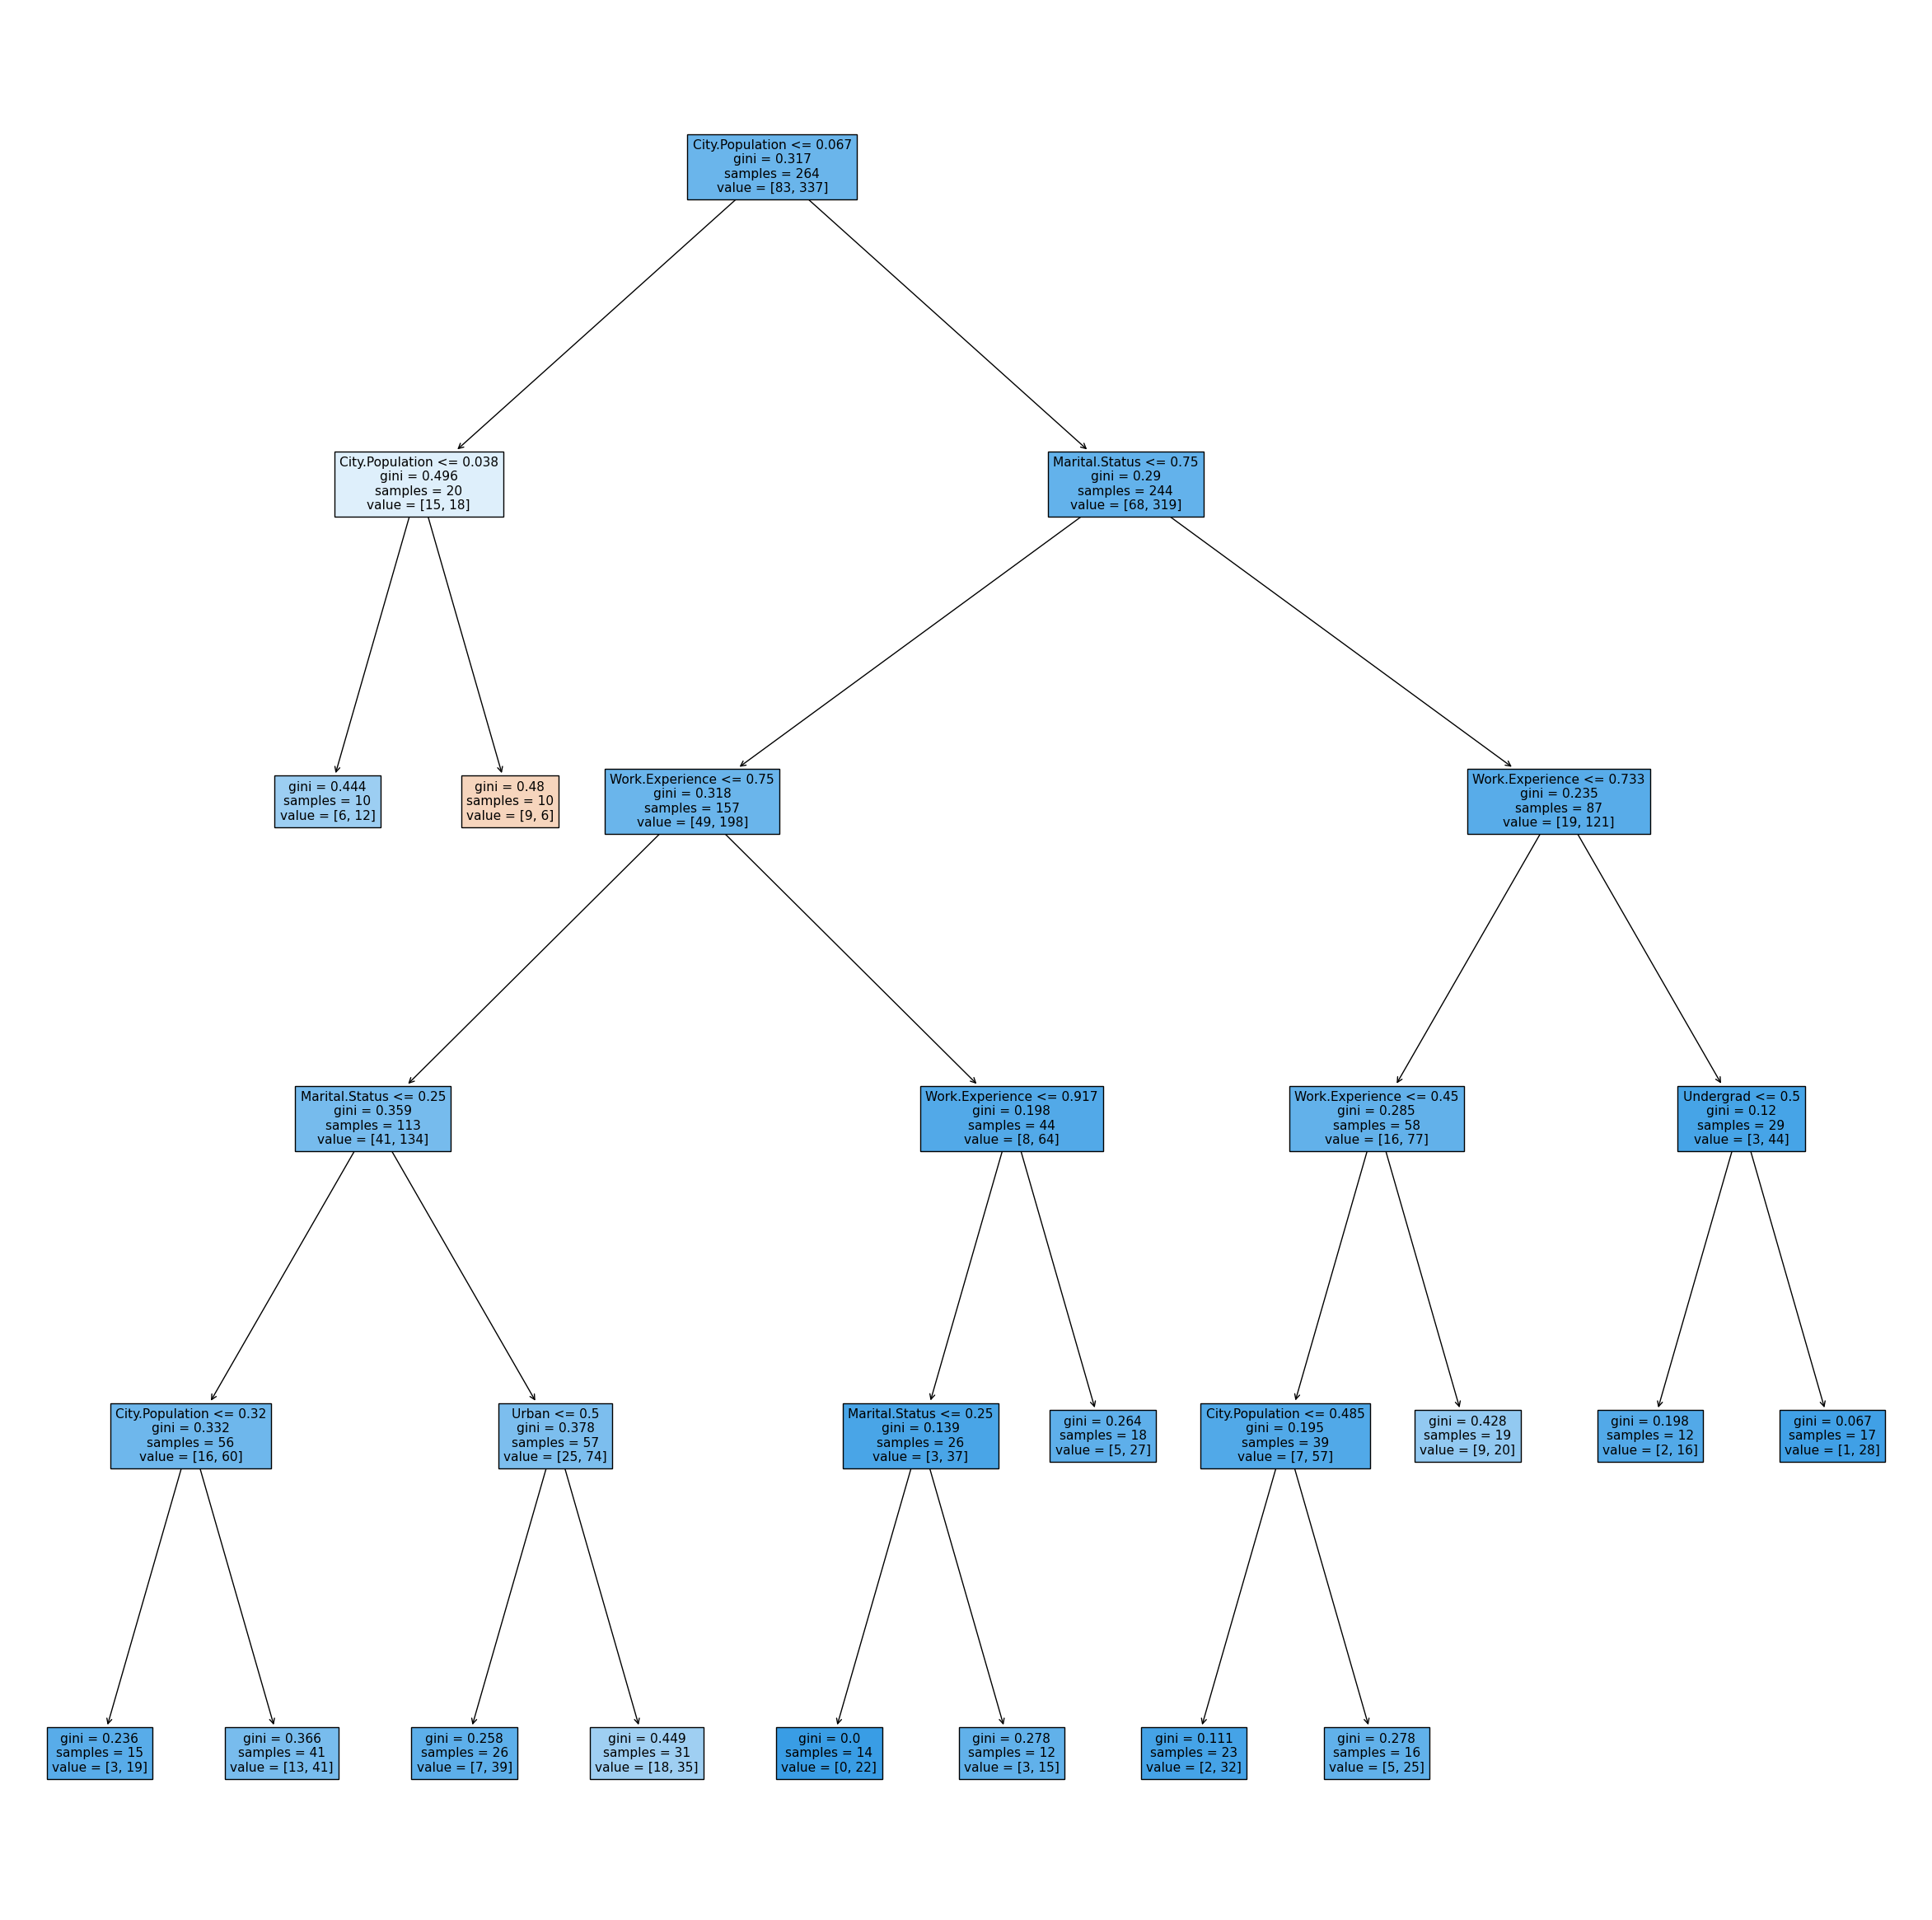

In [45]:
plt.figure(figsize=(30,30))
_ = tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True)

# model2

In [47]:

params = {
    'n_estimators': [15,20,25,10],
    'max_depth': [8,12,15,9],
    'min_samples_leaf': [5,6,8,9,10],
    }

reg=RandomForestClassifier()
grid= GridSearchCV(estimator=reg,cv=20,param_grid=params)
grid.fit(X_train, y_train)
grid.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=8, n_estimators=15)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.79      0.88       180

    accuracy                           0.79       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.79      0.88       180



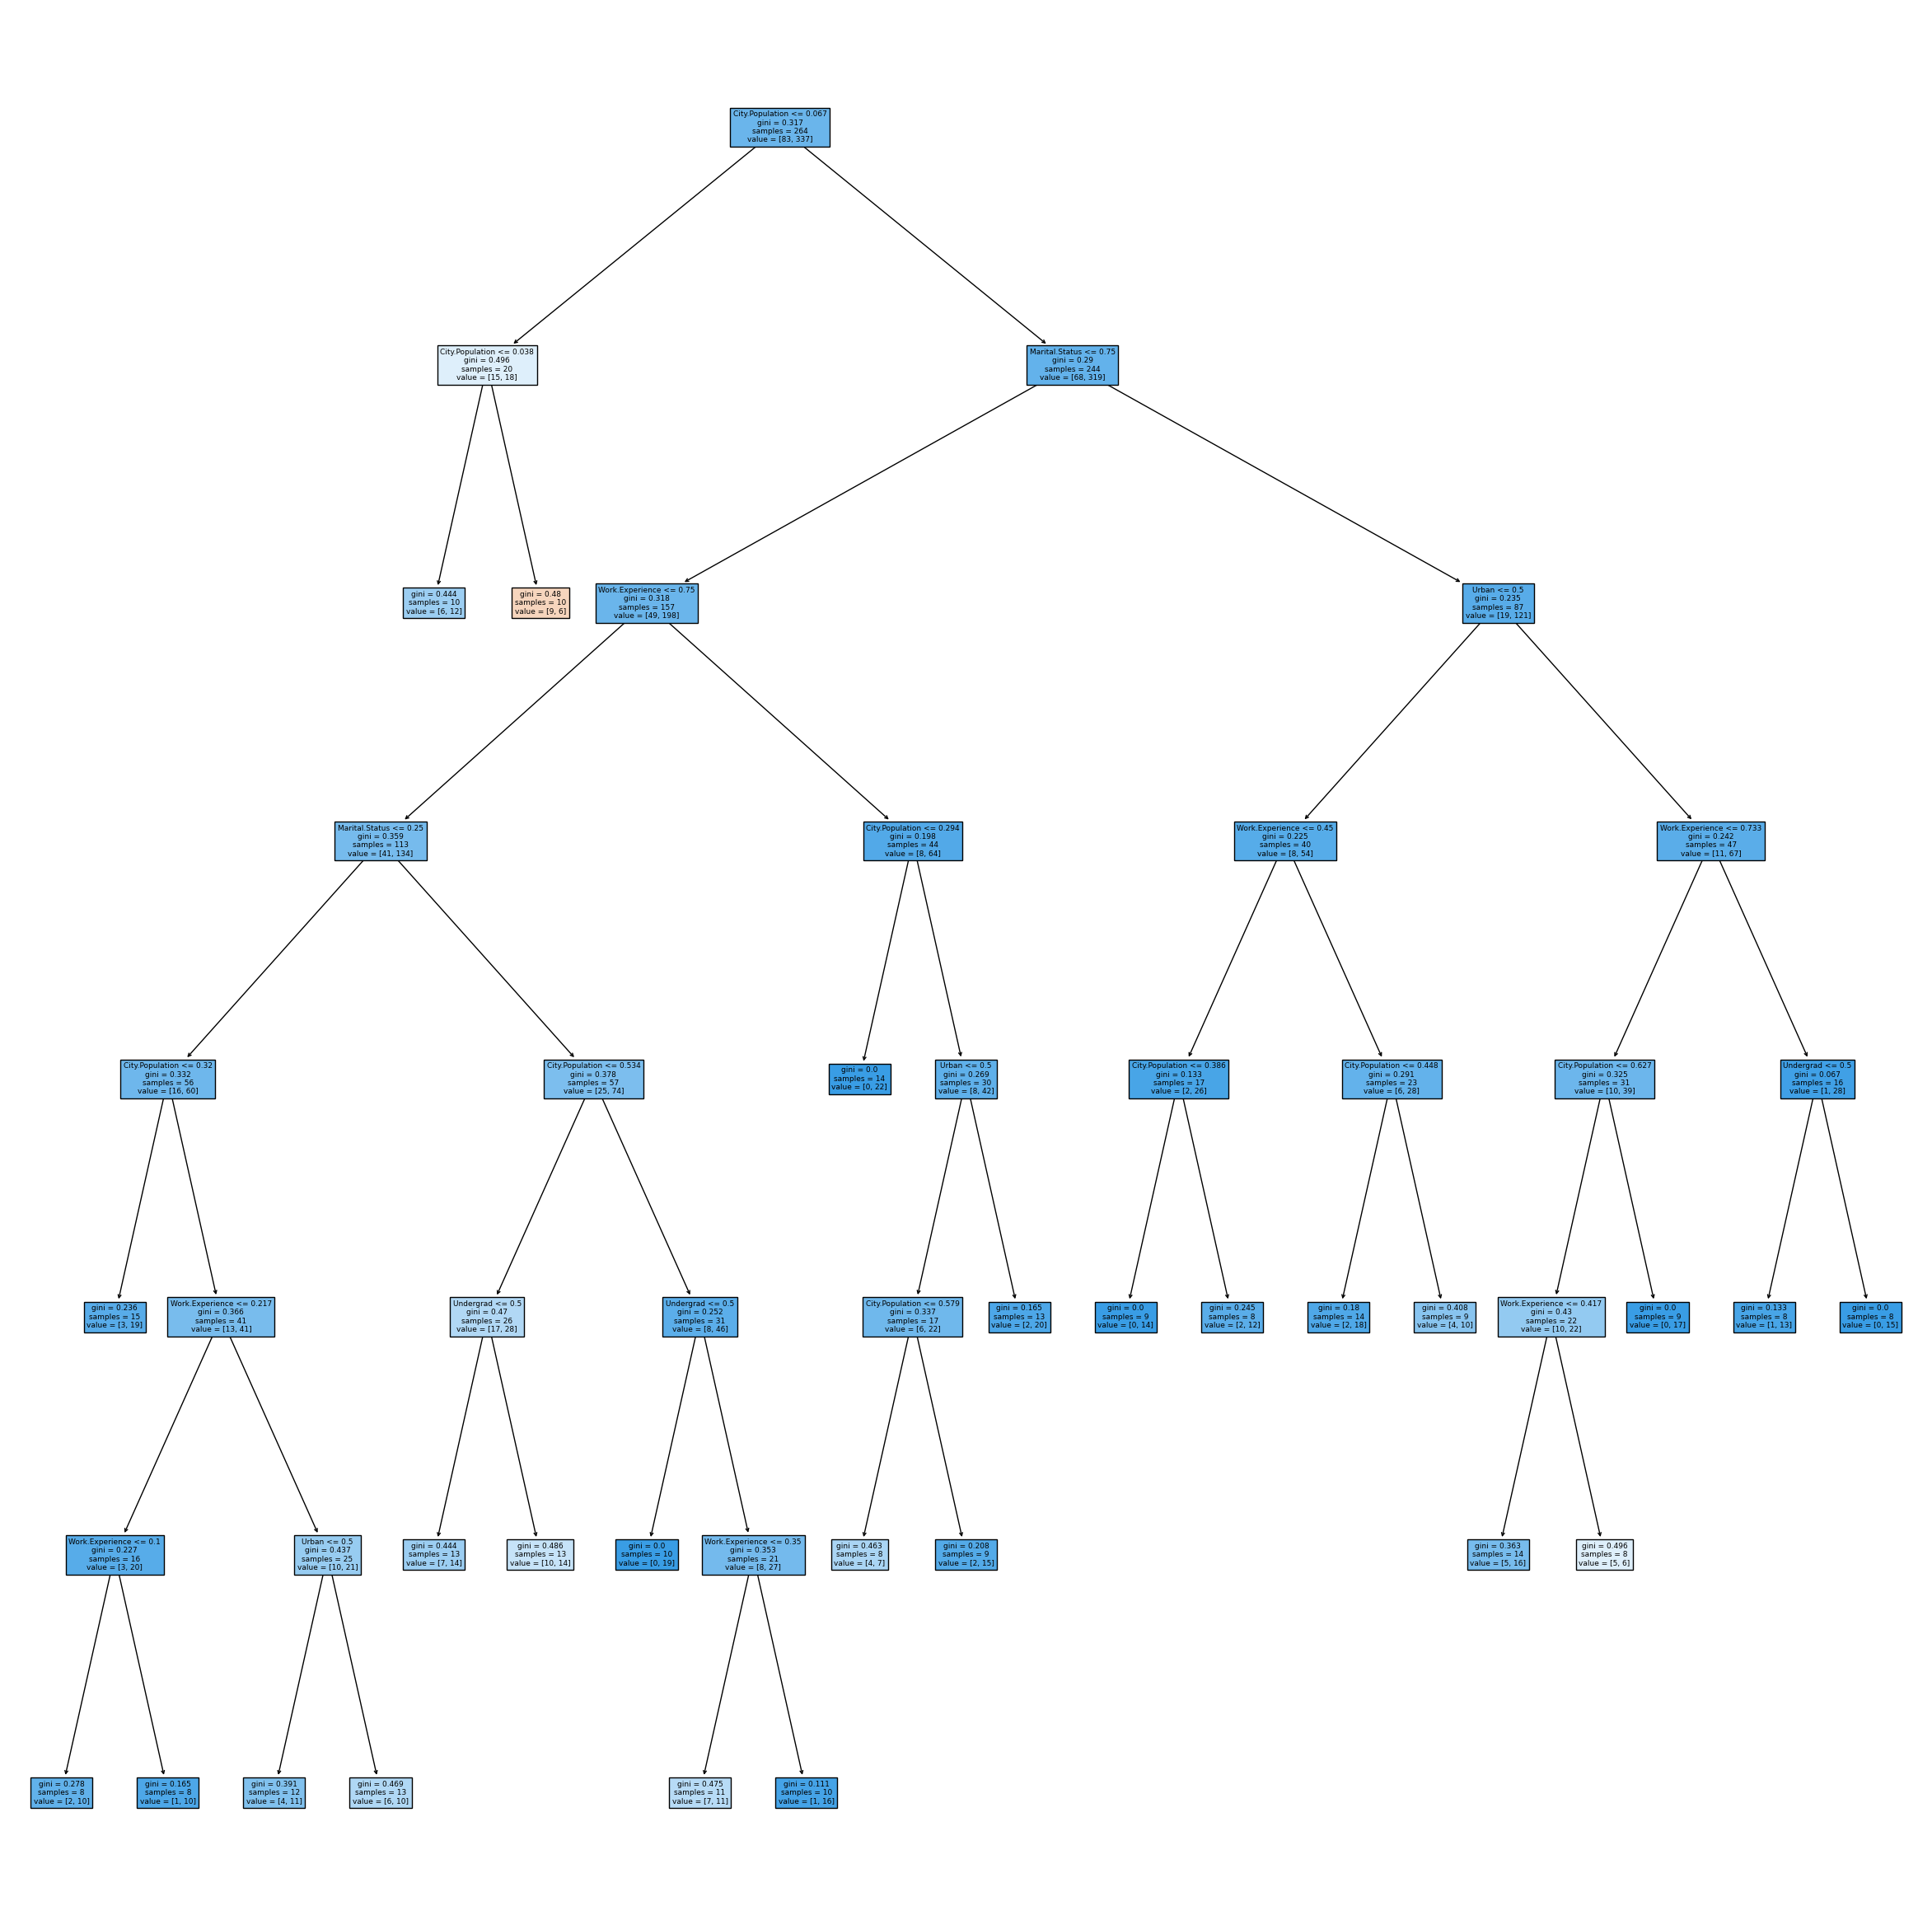

In [49]:
regr= RandomForestClassifier(random_state=0,n_estimators=15,min_samples_leaf=8,max_depth=12)
model=regr.fit(X_train, y_train)
pred=model.predict(X_test)
y_pred=model.predict(X_test)
m=classification_report(y_pred,y_test)
print(m)
plt.figure(figsize=(30,30))
_ = tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True)